# **BAN 6440 MODULE 4 Assignment**

### **K-MEANS CLUSTERING OF WHOLeSALE CUSTOMERS DATASET**

In [1]:
#importing necesary libraries and dependencies

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('Wholesale_customers_data[1].csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.shape

(440, 8)

In [6]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df1 = df.drop(['Channel', 'Region'], axis=1)

# **REMOVING OUTLIERS**

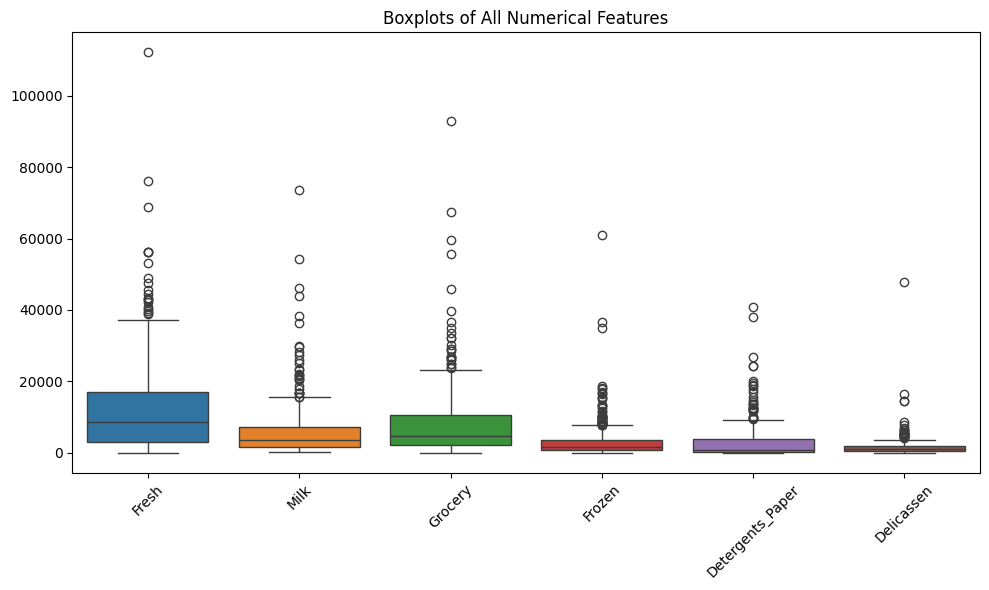

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title('Boxplots of All Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**we will remove the outlier by the using the IQR method. The IQR removes data points that are outside the quartile range**

In [10]:
for col in df1.select_dtypes(include='number'):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]

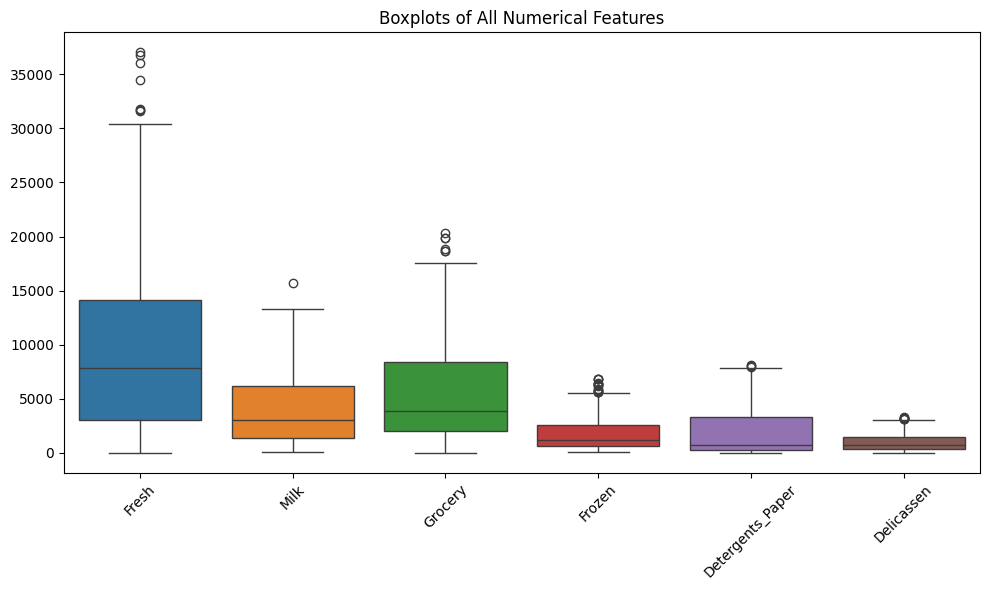

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title('Boxplots of All Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df1.shape

(318, 6)

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

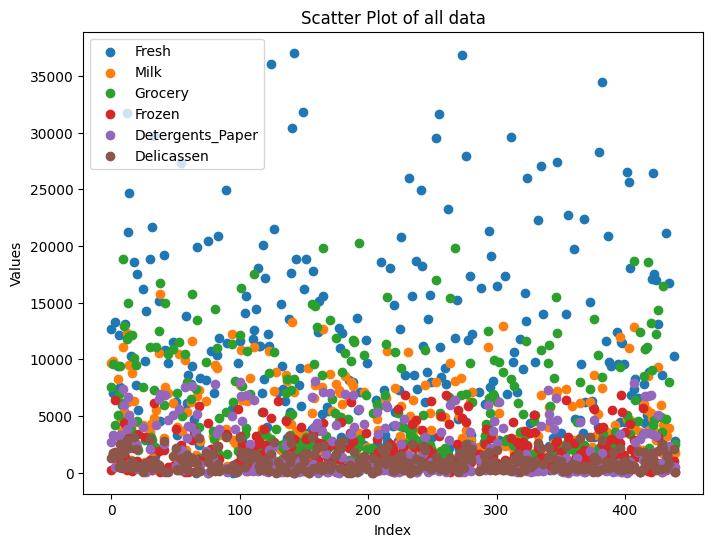

In [14]:
# Scatter plot
plt.figure(figsize=(8,6))
for column in df1.columns:
    plt.scatter(df1.index, df1[column], label=column)

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot of all data")
plt.legend()
plt.show()

# **K-Means Clustering**

This involves using algorithm to divide the dataset into clusters based on the similarities of the datapoint and their proximity to the centroid. The algorithm we used is called K-means algorithm. However, we have determine the optimal numner of clusters to segment the clusters, to accomplish that we will use the ***Elbow method***

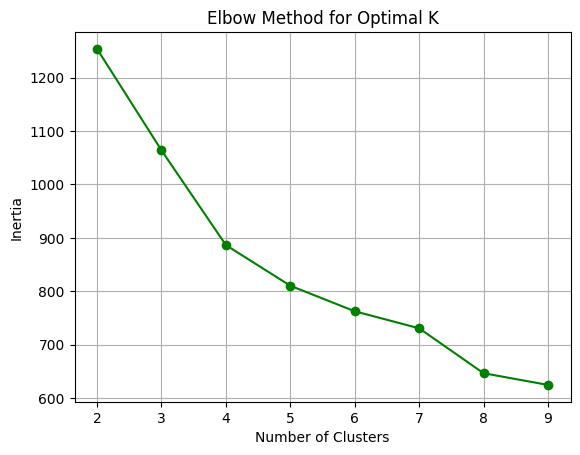


 Optimal number of clusters (K) is: 3


In [15]:
# Empty list
inertia = []

# range of k to test
k_values = range(2, 10)
for k in k_values:
    elb = KMeans(n_clusters=k, random_state=42)
    elb.fit(df_scaled)
    inertia.append(elb.inertia_)

# Plot
plt.plot(k_values, inertia, marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Identify the optimal K using the "elbow" method
diff = np.diff(inertia)
k_optimal = k_values[np.argmin(diff) + 1]

print(f"\n Optimal number of clusters (K) is: {k_optimal}")

### **Applying KMEANS Clustering**

In [16]:
model = KMeans(n_clusters=3, random_state=42, n_init=10)

# clusters (y) Output
clusters = model.fit_predict(df_scaled)
clusters[:10]

array([1, 1, 0, 1, 2, 1, 2, 1, 1, 2], dtype=int32)

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

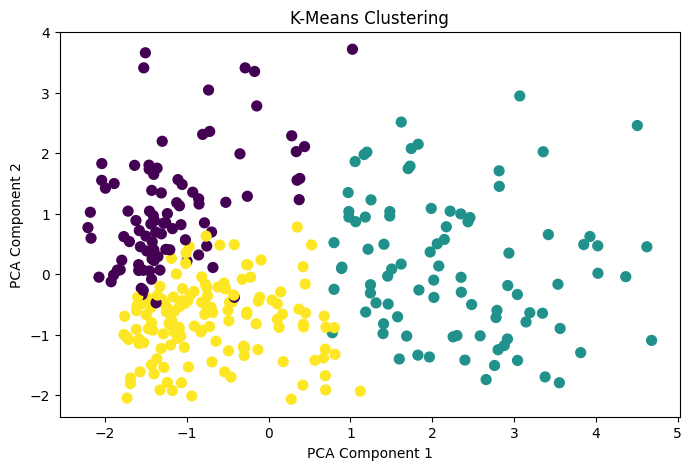

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering')
plt.savefig('cluster_plot.png')
plt.show()

In [19]:
df1['Clusters'] = clusters

In [20]:
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
3,13265,1196,4221,6404,507,1788,0
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,2


In [21]:
df1.to_csv('clustered_wholesale_data.csv', index=False)

In [22]:
cluster_means = df1.groupby('Clusters')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
print(cluster_means)

                 Fresh         Milk       Grocery       Frozen  \
Clusters                                                         
0         15344.307692  2144.692308   2908.142857  3524.703297   
1          8444.433333  7868.100000  11551.566667  1343.744444   
2          6817.854015  2666.145985   3393.934307   953.321168   

          Detergents_Paper   Delicassen  
Clusters                                 
0               518.736264  1123.923077  
1              4688.611111  1393.900000  
2               847.678832   622.226277  


### **Understanding the Cluster Profiles**

Since clustering is based on customers' annual spending across different product categories, each cluster reflects a distinct group of customers with similar buying behaviors. To make sense of these clusters, we can look at the average spending per category within each group.

#### **Cluster 0: Broad-Spending, High-Volume Buyers (e.g., Supermarkets or Large Retailers)**

High expenditures across most product categories particularly Grocery, Milk, and Detergents_Paper with consistently moderate to high spending on fresh and Frozen items.This cluster consist of large supermarkets and large retailers that buy bulk to meet their diverse customers'demands.


#### **Cluster 1: Fresh-Oriented Buyers (e.g., Restaurants or Fresh Produce Vendors)**

Significantly high spending on Fresh items, with relatively lower spending in categories such as Milk, Grocery, and Detergents_Paper.This cluster includes businesses like restaurants, cafés, or specialized food stores that emphasize fresh produce. Their purchasing indicates a strong preference for perishable goods.

##### **Cluster 2: Low-Volume or Specialized Buyers (e.g., Small Shops or Delicatessens)**

Generally low to moderate spending overall, with occasional higher spending in specific categories such as Delicassen or Frozen foods.These customers may represent smaller or niche-focused businesses, such as convenience stores or specialty food shops, that have more specific or limited purchasing needs.

# **REFERENCE:**

Dataset souce : **UCI MACHINE LEARNING REPOSITORY**
 [URL](https://archive.ics.uci.edu/dataset/292/wholesale+customers)